<a href="https://colab.research.google.com/github/divx1979/IMB_CLASSIFICATION/blob/main/German_IMB_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the data
The German Credit dataset presents a challenge due to its class imbalance. Since applicants with bad credit represent a minority, misclassifying them as good credit (false negatives) can have significant consequences. Therefore, evaluating model performance should prioritize metrics that capture this cost asymmetry. Techniques like oversampling or undersampling the majority class, or using metrics like F1-score with a higher beta for the minority class, are crucial to ensure the model effectively identifies bad credit risks

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

In [42]:
##hist

In [43]:
# ax = subs1.hist()

# for axis in ax.flatten():
#   axis.set_xticklabels([])
#   axis.set_yticklabels([])
# plt.show()

In [53]:
##step 1. EDA

          duration        amount  installment_rate  present_residence  \
count  1000.000000   1000.000000       1000.000000        1000.000000   
mean     20.903000   3271.258000          2.973000           2.845000   
std      12.058814   2822.736876          1.118715           1.103718   
min       4.000000    250.000000          1.000000           1.000000   
25%      12.000000   1365.500000          2.000000           2.000000   
50%      18.000000   2319.500000          3.000000           3.000000   
75%      24.000000   3972.250000          4.000000           4.000000   
max      72.000000  18424.000000          4.000000           4.000000   

               age  number_credits  people_liable  credit_risk  
count  1000.000000     1000.000000    1000.000000  1000.000000  
mean     35.546000        1.407000       1.155000     0.700000  
std      11.375469        0.577654       0.362086     0.458487  
min      19.000000        1.000000       1.000000     0.000000  
25%      27.00000

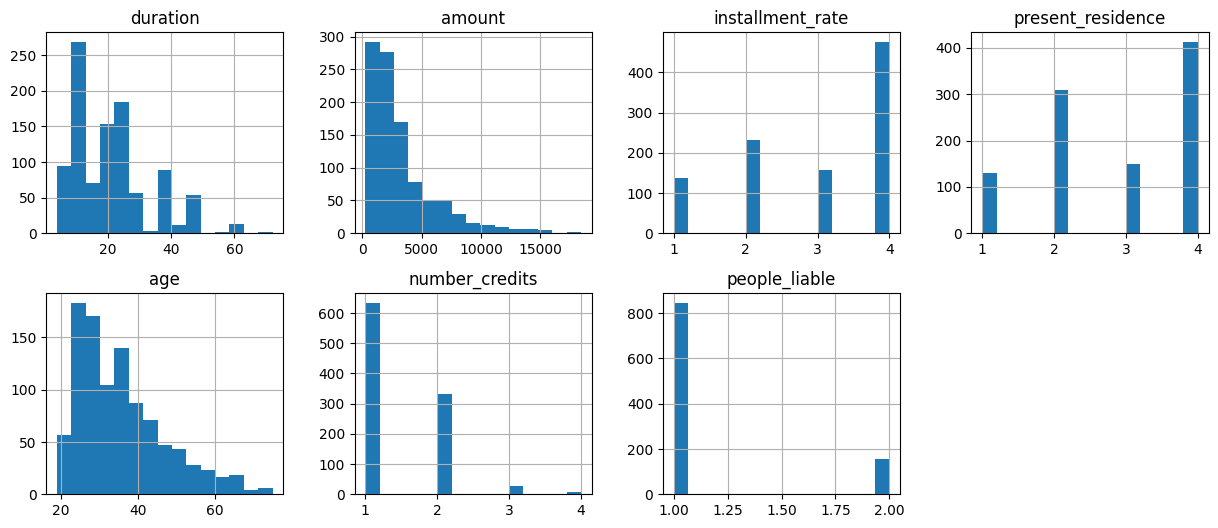

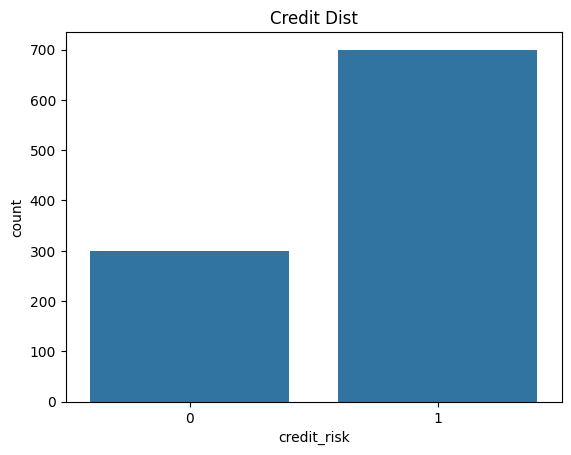

In [86]:
import seaborn as sns

da11 = pd.read_csv('/content/modified_GermanCredit.csv')

print(da11.describe())

print(da11.info())

numerical_cols = ['duration', 'amount', 'installment_rate', 'present_residence', 'age',
                  'number_credits', 'people_liable']
categorical_cols = [col for col in da11.columns if col not in numerical_cols]

# Convert numerical columns to int (if they are not already)
for col in numerical_cols:
    da11[col] = pd.to_numeric(da11[col], errors='coerce')  # Convert columns to numeric, coerce errors

# Convert categorical columns to category type (if they are not already)
for col in categorical_cols:
    da11[col] = da11[col].astype('category')

# Check the changes
print(da11.dtypes)

da11[numerical_cols].hist(bins = 15, figsize = (15, 6), layout = (2, 4))

plt.show()

sns.countplot(x = 'credit_risk', data = da11)

plt.title('Credit Dist')

plt.show()


In [87]:
data = da11

In [88]:
##Step 2. Model Test Harness
##Use RepeatedStratifiedKFold With F2 Measure As Data IMB

In [89]:
X = da11.drop('credit_risk', axis = 1)
y = da11['credit_risk']

In [90]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer

##define F2 Score

def f2_sc(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta = 2)

f2 = make_scorer(f2_sc)

##model

def eval_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  sc1 = cross_val_score(model, X, y, cv = cv, scoring = f2, n_jobs = -1)
  return sc1

In [91]:
##Step 4. Evaluate Different Models

In [92]:
da11.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [93]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming the correct name is 'Credit Risk'
X = data.drop('credit_risk', axis=1)  # features
y = data['credit_risk']  # target

# Identify categorical features for transformation
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Setup cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(pipeline, X, y, scoring=f2, cv=cv, n_jobs=-1)  # ensure 'f2' scorer is defined or use a built-in

print("Mean F2 Score:", np.mean(scores))
print("Standard Deviation of F2 Scores:", np.std(scores))


Mean F2 Score: 0.8991391605515148
Standard Deviation of F2 Scores: 0.023920166994204087


In [94]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [99]:
##Step 3. Eval Mod

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv('/content/modified_GermanCredit.csv')

# Split the data into features and target
X = data.drop('credit_risk', axis=1)
y = data['credit_risk']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Create the preprocessing components
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)


In [97]:
# Correcting the calculation of F2 score
f2_score_test = fbeta_score(y_test, y_pred, beta=2)  # directly using fbeta_score function

# Generate a classification report
classification_report_output = classification_report(y_test, y_pred, target_names=["Bad Risk", "Good Risk"])

f2_score_test, classification_report_output


(0.8859890109890108,
 '              precision    recall  f1-score   support\n\n    Bad Risk       0.67      0.41      0.51        59\n   Good Risk       0.79      0.91      0.85       141\n\n    accuracy                           0.77       200\n   macro avg       0.73      0.66      0.68       200\nweighted avg       0.75      0.77      0.75       200\n')

In [101]:
##Step 4. UnderSampling And Test On New Data

In [102]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
data = pd.read_csv('/content/modified_GermanCredit.csv')

# Split data into features and target variable
X = data.drop('credit_risk', axis=1)
y = data['credit_risk']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create a column transformer with OneHotEncoder for categorical variables and StandardScaler for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Create a pipeline that includes preprocessing, undersampling and a classifier
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersampler', undersampler),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define Repeated Stratified K-Fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define the F2 score as the metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate the model using cross-validation
f2_scores = cross_val_score(model, X, y, scoring=f2_scorer, cv=cv)

# Print the F2 scores
print("F2 Scores per fold:", f2_scores)
print("Mean F2 Score:", np.mean(f2_scores))
print("Standard Deviation of F2 Scores:", np.std(f2_scores))


F2 Scores per fold: [0.68452381 0.71005917 0.64954683 0.67567568 0.75443787 0.68249258
 0.68656716 0.75667656 0.69277108 0.71641791 0.67164179 0.75221239
 0.66666667 0.62883436 0.75443787 0.72271386 0.7748538  0.69277108
 0.68452381 0.6626506  0.72271386 0.73313783 0.63063063 0.62883436
 0.84527221 0.625      0.68807339 0.7771261  0.72700297 0.73529412]
Mean F2 Score: 0.7044520117841253
Standard Deviation of F2 Scores: 0.05053981784497062
